In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Assignment 2 by Josefin Kokkinakis and Eli Uhlin, group 30
We have both worked around ... hours each

In [3]:
#Csv file to DataFrame:

df = pd.read_csv('data_assignment2.csv')

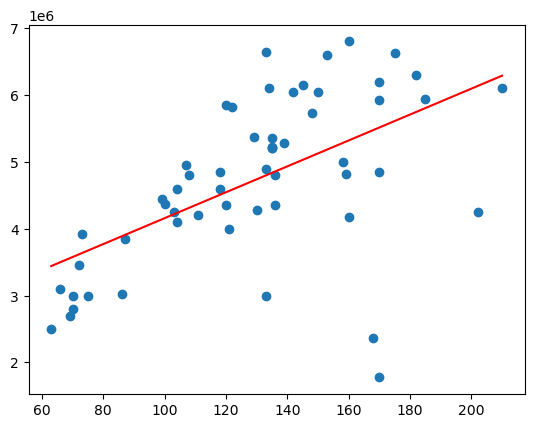

In [4]:
x = df['Living_area']
y = df['Selling_price']


model = np.poly1d(np.polyfit(x,y,1))
line = np.linspace(min(x),max(x),10)
plt.plot(line,model(line),color='red')
plt.scatter(x,y)
plt.show()


#model = LinearRegression().fit(x, y)

1. a)
There were some rows that had incomplete data entries but we did not remove them since they had complete information regarding the selling price and living area which are the 2 parameters we are focused on.
So we preformed no data cleaning.
See plot below.

/tmp/ipykernel_170736/499558288.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


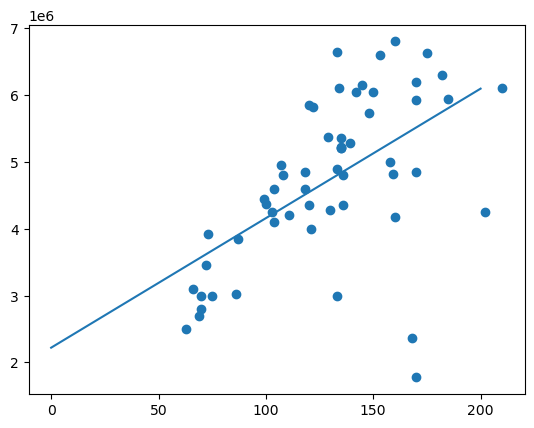

In [69]:
#a) 
x = df['Living_area']
y = df['Selling_price']

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 200, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()

1. b)
The slope of the line is: array([19370.13854733])
The intercept of the lilne is: 2220603.243355869
See the calculations below.

In [70]:
#k-value
#Slope of the line:
model.coef_

array([19370.13854733])

In [71]:
# m-value
#Intercept of the line:
model.intercept_

2220603.243355869

1. c)
Predicted selling prices:
For 10m²: 2414304.62882918
For 100m²: 4157617.09808903
For 150m²: 5126124.02545561
For 200m²: 6094630.95282218
For 1000m²: 21590741.79068745

See the calculations below.

In [72]:
#Predicted selling price for 10m²
model.predict([[10]])

array([2414304.62882918])

In [73]:
#Predicted selling price for 100m²
model.predict([[100]])

array([4157617.09808903])

In [74]:
#Predicted selling price for 150m²
model.predict([[150]])

array([5126124.02545561])

In [75]:
#Predicted selling price for 200m²
model.predict([[200]])

array([6094630.95282218])

In [76]:
#Predicted selling price for 1000m²
model.predict([[1000]])

array([21590741.79068745])

/tmp/ipykernel_170736/3082055774.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


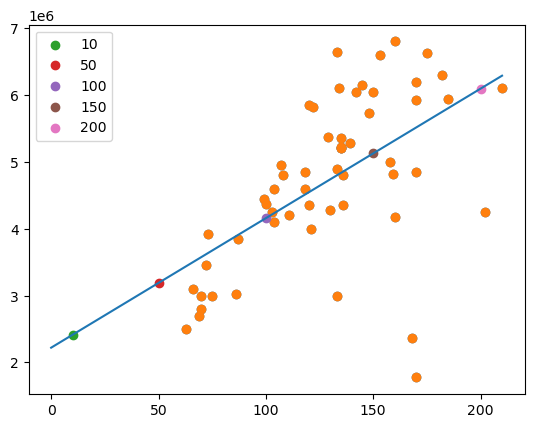

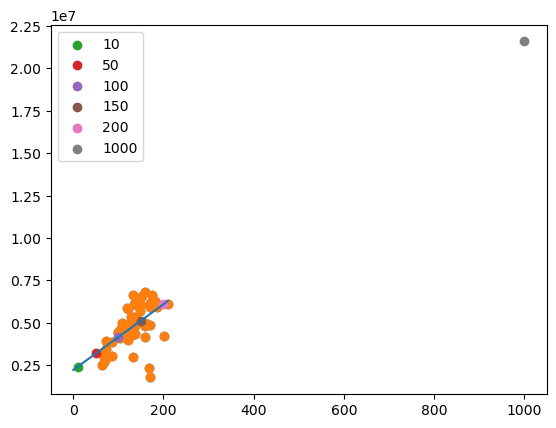

In [77]:
#Linear regression model with the wanted predictions plotted on the line
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 210, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);


plt.scatter(x,y)
plt.scatter(10, model.predict([[10]]), label='10')
plt.scatter(50, model.predict([[50]]), label='50')
plt.scatter(100, model.predict([[100]]), label='100')
plt.scatter(150, model.predict([[150]]), label='150')
plt.scatter(200, model.predict([[200]]), label='200')
plt.legend()
plt.show()
plt.scatter(x, y)
plt.plot(xfit, yfit);

plt.scatter(x,y)
plt.scatter(10, model.predict([[10]]), label='10')
plt.scatter(50, model.predict([[50]]), label='50')
plt.scatter(100, model.predict([[100]]), label='100')
plt.scatter(150, model.predict([[150]]), label='150')
plt.scatter(200, model.predict([[200]]), label='200')
plt.scatter(1000, model.predict([[1000]]), label='1000')
plt.legend()

                  kanske inte ha med båda?????
plt.show()

1. d)
See plot below

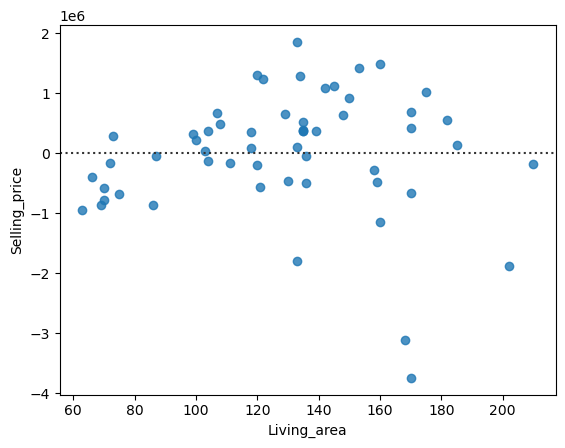

In [78]:
#d) 
#Residual plot
sns.residplot(x='Living_area',y='Selling_price',data=df)
plt.show()


1. e)
We do not think this is a very useful model since the residual plot indicates a high variance. The limitation is that it is not very accurate. To improve both the model and the accuracy we could include more parameters (especially since they exist in the dataframe) such as landsize, and biarea. 
This model should not be used in other areas than Landvetter since the prices and sizes of the living arrangements can depend on multiple factors such as local population, local wealth in the area or distance to the city etc. These factors not included in the dataset has a huge impact on selling price as well, if this data could be obtained it would help alot with creating a more accurate model.


In [79]:
from sklearn.datasets import load_iris
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html